In [1]:
using DrWatson
@quickactivate "MEngProject"
using MEngProject, CUDA, DifferentialEquations, PyPlot, NNlib,  ImageFiltering, Images, MEngProject.LaminartKernels, MEngProject.LaminartInitFunc, MEngProject.Utils, BenchmarkTools, Test

┌ Info: Precompiling MEngProject [d0493a11-efc0-4c7c-9b66-d0bd5a04cc55]
└ @ Base loading.jl:1260


In [2]:
using OrdinaryDiffEq, ParameterizedFunctions, LSODA, Sundials, DiffEqDevTools

# GPU

In [61]:
p = LaminartInitFunc.parameterInit_conv_gpu(datadir("vis_illusionsDS","viper00626.jpg"), Parameters.parameters_f32);

In [62]:
tspan = (0.0f0, 100f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartFunc.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [63]:
sol = solve(prob);

In [6]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  139.04 MiB
  allocs estimate:  2961361
  --------------
  minimum time:     1.375 s (3.27% GC)
  median time:      1.386 s (3.48% GC)
  mean time:        1.392 s (3.76% GC)
  maximum time:     1.419 s (4.78% GC)
  --------------
  samples:          4
  evals/sample:     1

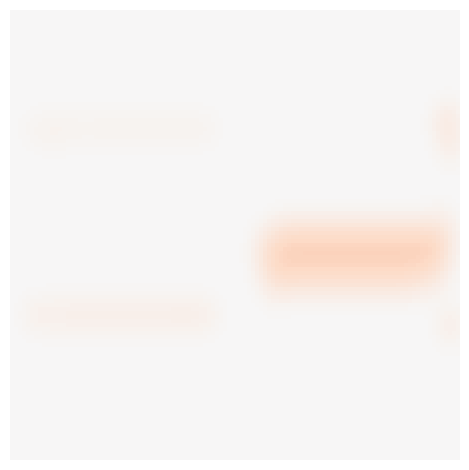

In [83]:
Utils.plot_rb(sol[:,:,10,1,end])

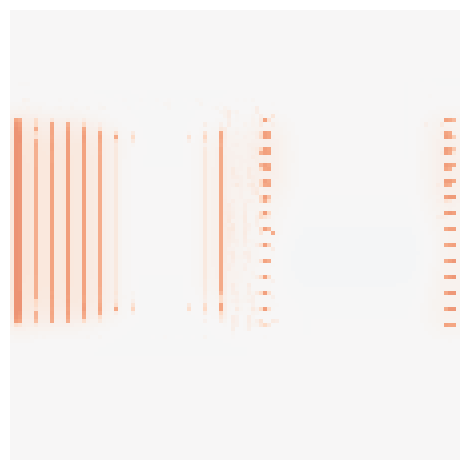

In [78]:
Utils.plot_rb(sol[:,:,7,1,end])

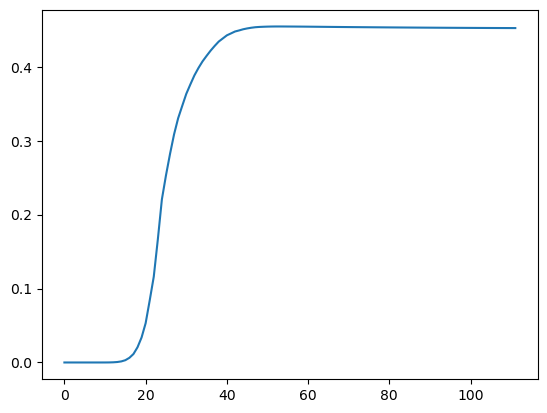

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f144784b6d0>

In [67]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [84]:
sol_1 = Array(sol)
sol = nothing;

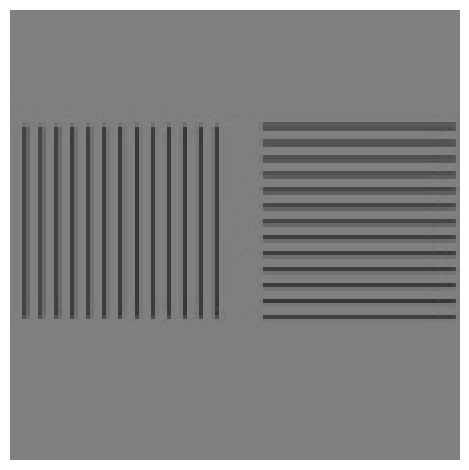

In [79]:
Utils.plot_gs(p.I[:,:,1,1])

In [ ]:
fig, ax = plt.subplots()

    im = ax.imshow(p.I, cmap=matplotlib.cm.gray,
               vmax=axMax, vmin=axMin)
    if clbar
        cbar = fig.colorbar(im,  shrink=0.9, ax=ax)
    end

    plt.axis("off")
    fig.tight_layout()
    plt.show()

In [76]:
p.I

112×112×1×1 CuArray{Float32,4}:
[:, :, 1, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1

In [449]:
p = LaminartInitFunc.parameterInit_conv_gpu(datadir("vis_illusionsDS","viper00661.jpg"), Parameters.parameters_f32);

In [470]:
tspan = (0.0f0, 200f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartFunc.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [471]:
sol = solve(prob);

In [ ]:
@benchmark sol = solve(prob)

In [ ]:
Utils.plot_gs(p.I[:,:,1,1])

In [ ]:
Utils.plot_rb(sol[:,:,10,1,end])

In [ ]:
Utils.plot_rb(sol[:,:,7,1,end])

In [ ]:
Utils.plot_rb(sol[:,:,8,1,end])

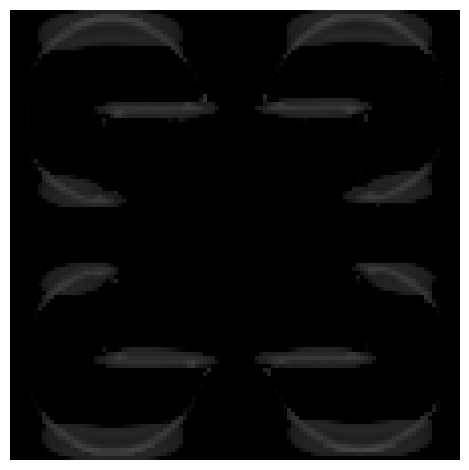

In [458]:
Utils.plot_gs(sol[:,:,2,1,end],axMin=-1e-9)

In [468]:
Utils.plot_gs(sol[:,:,3,1],axMin=-1e-5)

MethodError: MethodError: no method matching getindex(::Nothing, ::Colon, ::Colon, ::Int64, ::Int64)

In [469]:
Utils.plot_gs(sol[:,:,4,1,end],axMin=-2e-9)

MethodError: MethodError: no method matching lastindex(::Nothing, ::Int64)
Closest candidates are:
  lastindex(!Matched::AbstractArray, ::Any) at abstractarray.jl:303

In [461]:
Utils.plot_gs(sol[:,:,5,1,end],axMin=-2e-9)

ArgumentError: ArgumentError: Image has min -2.3361122e-9,outside range

In [462]:
Utils.plot_gs(sol[:,:,6,1,end],axMin=-1e-10)

ArgumentError: ArgumentError: Image has min -1.39598555e-8,outside range

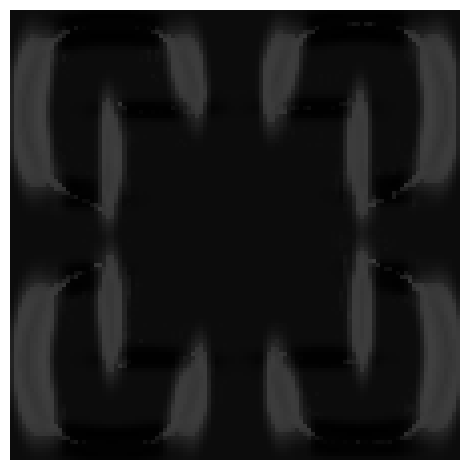

In [463]:
Utils.plot_gs(sol[:,:,7,1,end],axMin=-1e-1)

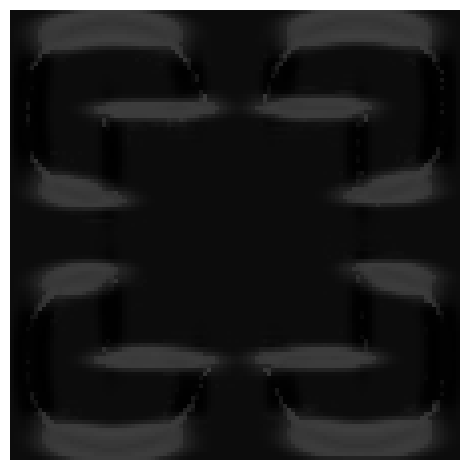

In [464]:
Utils.plot_gs(sol[:,:,8,1,end],axMin=-1e-1)

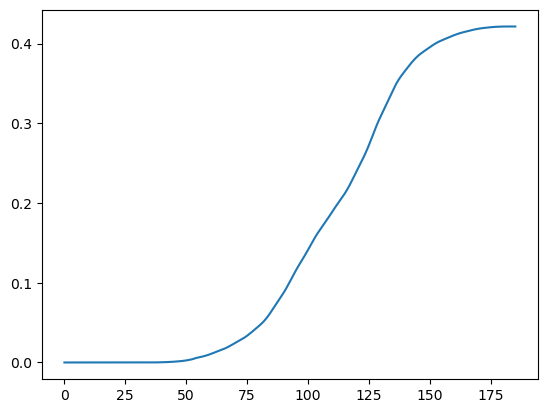

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1441592350>

In [465]:
plot(sol[findmax(sol[:,:,7,1,end])[2][1],findmax(sol[:,:,7,1,end])[2][2],7,1,:])

In [466]:
sol_1 = Array(sol)
sol = nothing;

# Try increasing length of H

In [132]:
p = Parameters.parameters_f32

(K = 2, δ_v = 1.25f0, δ_c = 0.25f0, δ_m = 0.01875f0, δ_z = 0.125f0, δ_s = 2.5f0, σ_1 = 1.0f0, C_1 = 1.5f0, C_2 = 0.075f0, σ_2 = 0.5f0, γ = 10.0f0, α = 0.5f0, ϕ = 2.0f0, Γ = 0.2f0, v_21 = 0.0f0, μ = 2.0f0, ν = 1.1f0, n = 6.0f0, att = 0.0f0, η_p = 2.1f0, η_m = 1.5f0, λ = 1.5f0, a_23_ex = 3.0f0, a_23_in = 0.5f0, v12_6 = 1.0f0, v12_4 = 5.0f0, ψ = 0.5f0, C_AB_l = 5, H_σ_x = 3.0f0, H_σ_y = 4.0f0, H_fact = 5.0f0, H_l = 19, T_fact = Float32[0.87, 0.13], T_p_m = 0.302f0, T_v2_fact = 0.625f0, H_size = 19, W_size = 19, lgn_equ_u = 1.0f0, lgn_equ_A = 0.0f0, lgn_equ_B = 0.0f0, filling = "circular", W_l = 19)

In [133]:
p = merge(p, (H_l = 25, ))

(K = 2, δ_v = 1.25f0, δ_c = 0.25f0, δ_m = 0.01875f0, δ_z = 0.125f0, δ_s = 2.5f0, σ_1 = 1.0f0, C_1 = 1.5f0, C_2 = 0.075f0, σ_2 = 0.5f0, γ = 10.0f0, α = 0.5f0, ϕ = 2.0f0, Γ = 0.2f0, v_21 = 0.0f0, μ = 2.0f0, ν = 1.1f0, n = 6.0f0, att = 0.0f0, η_p = 2.1f0, η_m = 1.5f0, λ = 1.5f0, a_23_ex = 3.0f0, a_23_in = 0.5f0, v12_6 = 1.0f0, v12_4 = 5.0f0, ψ = 0.5f0, C_AB_l = 5, H_σ_x = 3.0f0, H_σ_y = 4.0f0, H_fact = 5.0f0, H_l = 25, T_fact = Float32[0.87, 0.13], T_p_m = 0.302f0, T_v2_fact = 0.625f0, H_size = 19, W_size = 19, lgn_equ_u = 1.0f0, lgn_equ_A = 0.0f0, lgn_equ_B = 0.0f0, filling = "circular", W_l = 19)

In [134]:
p.H_l

25

ArgumentError: ArgumentError: invalid index: :H_l of type Symbol

In [135]:
p = LaminartInitFunc.parameterInit_conv_gpu(datadir("vis_illusionsDS","viper00661.jpg"), p);

In [136]:
tspan = (0.0f0, 100f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

f = LaminartFunc.LamFunction(
    similar(arr1), #x
    similar(arr1), #m
    similar(arr1), #s
 similar(arr2), #x_lgn,
similar(arr1), #C,
similar(arr1), #H_z,
similar(arr1), # dy_temp,
similar(arr1), # dm_temp,
similar(arr1), # dz_temp,
similar(arr1), # ds_temp,
similar(arr2), # dv_temp,
similar(arr1), # H_z_temp,
similar(arr2), #  V_temp_1,
similar(arr2), #  V_temp_2,
similar(arr1), #  A_temp,
similar(arr1), #   B_temp
    );

prob = ODEProblem(f, u0, tspan, p);

In [137]:
sol = solve(prob);

In [88]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  162.04 MiB
  allocs estimate:  3345849
  --------------
  minimum time:     1.778 s (0.00% GC)
  median time:      1.874 s (3.01% GC)
  mean time:        1.844 s (2.08% GC)
  maximum time:     1.881 s (3.00% GC)
  --------------
  samples:          3
  evals/sample:     1

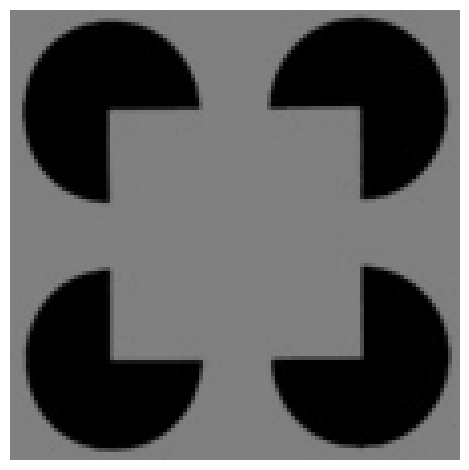

In [93]:
Utils.plot_gs(p.I[:,:,1,1])

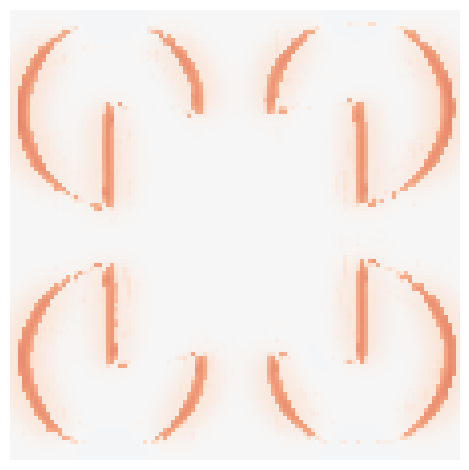

In [139]:
Utils.plot_rb(sol[:,:,7,1,end])

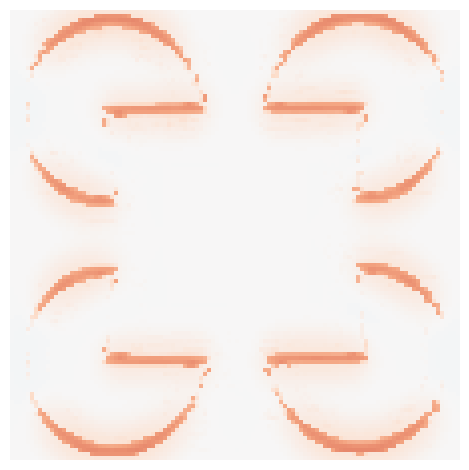

In [140]:
Utils.plot_rb(sol[:,:,8,1,end])

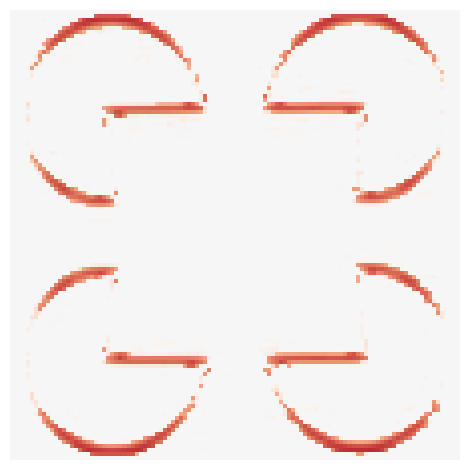

In [142]:
Utils.plot_rb(sol[:,:,4,1,end])

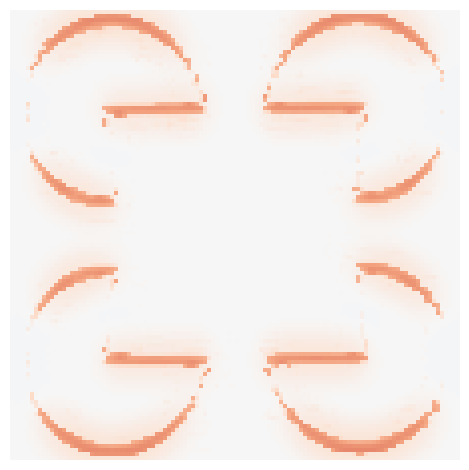

In [92]:
Utils.plot_rb(sol[:,:,8,1,end])

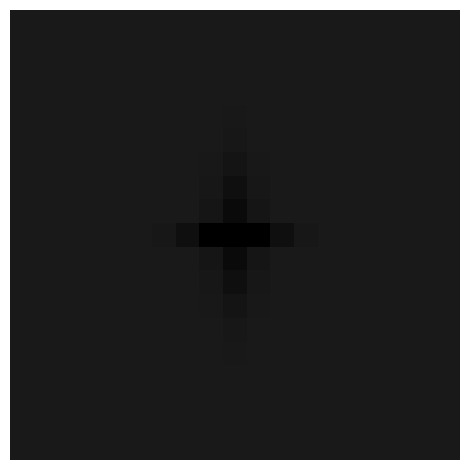

In [160]:
Utils.plot_gs(p.k_W_p[:,:,1,2])

In [441]:
T_temp = reshape(Array{eltype(Float32)}(undef, p.K * p.K), 1, 1, p.K, p.K)
H_temp = reshape(zeros(eltype(Float32), p.H_l, p.H_l * p.K * p.K),p.H_l,p.H_l,p.K,p.K) 
W_temp = reshape(Array{eltype(Float32)}(undef, p.W_l, p.W_l * p.K * p.K), p.W_l, p.W_l, p.K, p.K)

# for k ∈ 1:p.K
#         θ = π * (k - 1.0f0) / p.K
# H_temp[:, :, k,k] = 13f0 .* LaminartKernels.gaussian_rot(5, 0.5, θ, p.H_l)
# # 		todo make T kernel more general for higher K
#         T_temp[1, 1, k,1] = p.T_fact[k]
#         T_temp[1, 1, 2,2] = p.T_fact[1]
#         T_temp[1, 1, 1,2] = p.T_fact[2]
#         #todo: generalise T and W for higher K
#         #         T_temp[:,:,k] = KernelFactors.gaussian(p.T_σ, p.K)
#         #         for l ∈ 1:p.K
#         #             W_temp[:,:,l,k] =
#         #         end
#     end

    W_temp[:, :, 1, 1] =
        330f0 .* LaminartKernels.gaussian_rot(6f0, 2.5f0, 0f0, p.W_l) .+
        LaminartKernels.gaussian_rot(3f0, 4f0, 0f0, p.W_l)

#     W_temp[:, :, 2, 2] =
#         5f0 .* LaminartKernels.gaussian_rot(3f0, 0.8f0,  π / 2f0, p.W_l) .+
#         LaminartKernels.gaussian_rot(0.4f0, 1f0, π / 2f0, p.W_l)

#     W_temp[:, :, 1, 2] = relu.(
#         0.2f0 .- LaminartKernels.gaussian_rot(2f0, 0.6f0, 0f0, p.W_l) .-
#         LaminartKernels.gaussian_rot(0.3f0, 1.2f0, 0f0, p.W_l))

#     W_temp[:, :, 2, 1] = relu.(
#         0.2f0 .- LaminartKernels.gaussian_rot(2f0, 0.6f0, π / 2f0, p.W_l) .-
#         LaminartKernels.gaussian_rot(0.3f0, 1.2f0, π / 2f0, p.W_l));

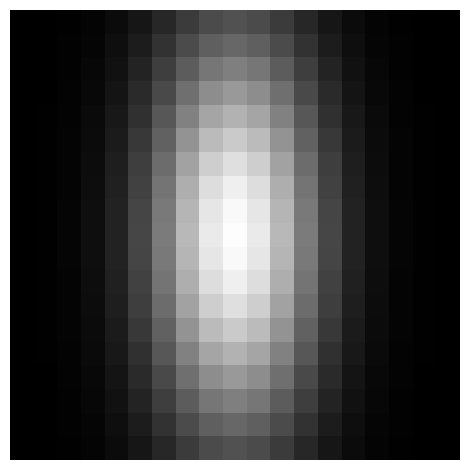

In [443]:
Utils.plot_gs(W_temp[:,:,1,1],axMax=4)

In [423]:
findmax(W_temp[:,:,1,1])

(0.29280892f0, CartesianIndex(7, 7))

In [444]:
p = LaminartInitFunc.parameterInit_conv_gpu(datadir("vis_illusionsDS","viper00626.jpg"), Parameters.parameters_f32);

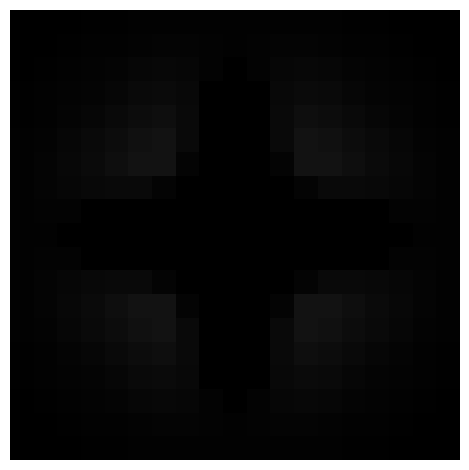

In [448]:
Utils.plot_gs(p.k_W_m[:,:,1,2],axMax=4)